In [1]:
! pip install opencv-python

In [2]:
# 환경 셋팅
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### OpenCV(Open source Computer Vision) 개요
- Computer Vision : 사람의 시각적인 부분을 기계로 구현하는 것을 목적으로 하는 딥러닝 분야
- OpenCV : 이미지, 동영상 등의 시각적인 처리를 지원하는 라이브러리
- C++로 제작되어 있고 Java, JS, Android, Python 등 다양한 언어에 사용할 수 있음
- 특히 파이썬에서 OpenCV를 사용할 경우 numpy, matplotlib 등 다양한 라이브러리들과 바로 연동하여 사용 가능

### 유용한 참고 사이트
https://opencv.org/ : OpenCV 공식 사이트

https://m.blog.naver.com/samsjang/220498694383 : 잘 정리된 OpenCV 관련 블로그

https://github.com/opencv/opencv : OpenCV github 사이트

https://learnopencv.com/ : 높은 수준의 결과물을 낼 수 있는 다양한 코드 제공 (프로젝트에 활용

In [3]:
# 이미지 라벨 확인하기
labels = os.listdir('train/')

labels

['Closed', 'no_yawn', 'Open', 'yawn']

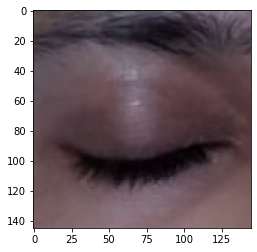

In [4]:
plt.imshow(plt.imread('train/Closed/_0.jpg'));

In [5]:
# 이미지 배열 및 크기 확인
a = plt.imread('train/yawn/10.jpg')
a.shape

(480, 640, 3)

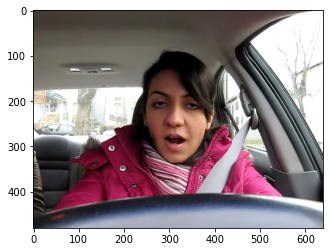

In [6]:
# 하품 이미지 확인하기
plt.imshow(a);

In [7]:
# 하품 여부 이미지 배경 제거하기
def face_for_yawn(direc='train', 
                  face_cas_path='data/prediction-images/haarcascade_frontalface_default.xml') : 
                  yaw_no = []
                  IMG_SIZE = 145
                  categories = ['yawn', 'no_yawn']
                  for category in categories : 
                    path_link = os.path.join(direc, category)
                    class_num1 = categories.index(category)
                    print(class_num1)
                    for image in os.listdir(path_link) : 
                      image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
                      face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
                      faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
                      for (x, y, w, h) in faces : 
                        img = cv2.rectangle(image_array, (x,y), (x+w, y+h), (0, 255, 0), 2)
                        roi_color = img[y:y+h, x:x+w]
                        resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                        yaw_no.append([resized_array, class_num1])
                  return yaw_no

yawn_no_yawn = face_for_yawn()

0
1


In [8]:
# 감은 눈 감지 않은 눈 이미지
def get_data(dir_path='train/', 
             face_cas='data/prediction-images/haarcascade_frontalface_default.xml',
             eye_cas='data/prediction-images/haarcascade.xml') : 
             labels = ['Closed', 'Open']
             IMG_SIZE = 145 
             data = []
             for label in labels : 
               path = os.path.join(dir_path, label)
               class_num = labels.index(label) 
               class_num += 2
               print(class_num)
               for img in os.listdir(path) : 
                 try : 
                   img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                   resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                   data.append([resized_array, class_num])
                 except Exception as e :
                   print(e)
             return data      

In [9]:
data_train = get_data()

2
3


In [10]:
# extend data and convert array
def append_data() : 
   yaw_no = face_for_yawn()
   data = get_data()
   yaw_no.extend(data)
   return np.array(yaw_no)

In [11]:
new_data = append_data()

0
1
2
3


C:\Users\user\AppData\Local\Temp\ipykernel_11576\1000733951.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(yaw_no)


In [12]:
# 라벨과 특성 분리하기
X = []
y = []
for feature, label in new_data : 
  X.append(feature)
  y.append(label)

In [13]:
# 배열 reshape
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)  # 3차원 배열을 1차원 배열로 변환시켜주기 위해 첫번째 인자에 -1 넣어줌

In [14]:
# 이진 레이블로 변환
# 필요 모듈 임포트
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

In [15]:
# 배열로 변환
y = np.array(y)

In [16]:
# 데이터셋 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)

In [17]:
X_train.shape

(1347, 145, 145, 3)

In [18]:
# X_test의 크기 확인
len(X_test)

578

In [20]:
# tensorflow 설치하기
!pip install tensorflow==2.6.1

  Using cached h5py-3.1.0-cp39-cp39-win_amd64.whl (2.7 MB)
  Using cached numpy-1.19.5-cp39-cp39-win_amd64.whl (13.3 MB)
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Attempting uninstall: six
    Found existing installation: six 1.16.0
    Uninstalling six-1.16.0:
      Successfully uninstalled six-1.16.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.1.1
    Uninstalling typing-extensions-4.1.1:
      Successfully uninstalled typing-extensions-4.1.1
  Attempting uninstall: h5py
    Found existing installation: h5py 3.7.0
    Uninstalling h5py-3.7.0:
      Successfully uninstalled h5py-3.7.0
  Rolling back uninstall of h5py
  Moving to c:\users\user\anaconda3\lib\site-packages\h5py-3.7.0.dist-info\
   from C:\User

ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\user\\anaconda3\\Lib\\site-packages\\h5py\\hdf5.dll'
Consider using the `--user` option or check the permissions.



In [22]:
# 텐서플로우 설치
import tensorflow
print(tensorflow.__version__)

2.6.1


In [23]:
# keras 설치
!pip install keras==2.6

  Attempting uninstall: keras
    Found existing installation: keras 2.10.0
    Uninstalling keras-2.10.0:
      Successfully uninstalled keras-2.10.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.1 requires h5py~=3.1.0, but you have h5py 3.7.0 which is incompatible.


In [24]:
from matplotlib import image
# 텐서플로우 관련 라이브러리 임포트하기
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [25]:
# 데이터 증강기법
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True,
                                     rotation_range=0.3)
test_generator = ImageDataGenerator(rescale=1/255)

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle = False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle = False)

In [26]:
# 모델 생성
model = Sequential()

# 컨볼루션 층
model.add(Conv2D(256, (3,3), activation = 'relu', input_shape = X_train.shape[1:]))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))                       # 컨볼루션 층 끝

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
# 출력층
model.add(Dense(4, activation = 'softmax'))       # 출력층 4개인 이유는 하품여부(2)+눈감음 여부(2)여서

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 143, 143, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 71, 71, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 34, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0

In [27]:
# 학습 및 평가방법 정하기
model.compile(loss = 'categorical_crossentropy', 
              metrics = ['acc'], 
              optimizer = 'Adam')

In [28]:
# 모델 학습시키기
h = model.fit(train_generator, epochs = 50, validation_data=test_generator, shuffle = True, 
              validation_steps = len(test_generator))

Epoch 1/50
43/43 [==============================] - 53s 1s/step - loss: 1.2405 - acc: 0.4573 - val_loss: 0.7207 - val_acc: 0.7353
Epoch 2/50
43/43 [==============================] - 60s 1s/step - loss: 0.5305 - acc: 0.7817 - val_loss: 0.3166 - val_acc: 0.8668
Epoch 3/50
43/43 [==============================] - 61s 1s/step - loss: 0.3833 - acc: 0.8419 - val_loss: 0.2735 - val_acc: 0.8979
Epoch 4/50
43/43 [==============================] - 59s 1s/step - loss: 0.3231 - acc: 0.8634 - val_loss: 0.2745 - val_acc: 0.8858
Epoch 5/50
43/43 [==============================] - 59s 1s/step - loss: 0.2983 - acc: 0.8745 - val_loss: 0.1862 - val_acc: 0.9325
Epoch 6/50
43/43 [==============================] - 59s 1s/step - loss: 0.2675 - acc: 0.8961 - val_loss: 0.2695 - val_acc: 0.8858
Epoch 7/50
43/43 [==============================] - 59s 1s/step - loss: 0.2771 - acc: 0.8812 - val_loss: 0.1816 - val_acc: 0.9291
Epoch 8/50
43/43 [==============================] - 60s 1s/step - loss: 0.2032 - acc: 0.91

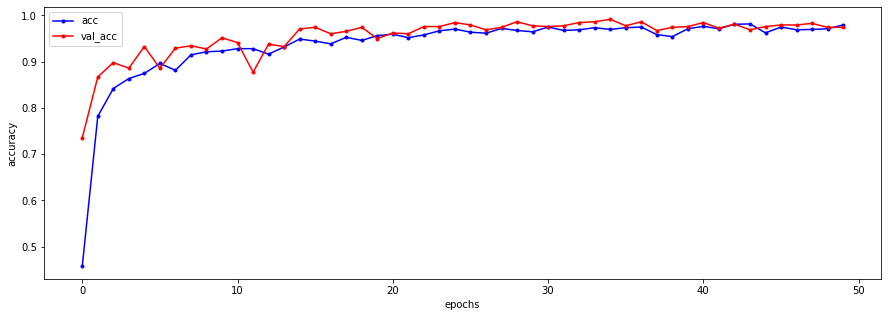

In [29]:
# 시각화
plt.figure(figsize = (15, 5))

plt.plot(h.history['acc'], label = 'acc', c='blue', marker = '.')
plt.plot(h.history['val_acc'], label = 'val_acc', c='red', marker = '.')

plt.xlabel("epochs")
plt.ylabel("accuracy")


plt.legend()
plt.show()

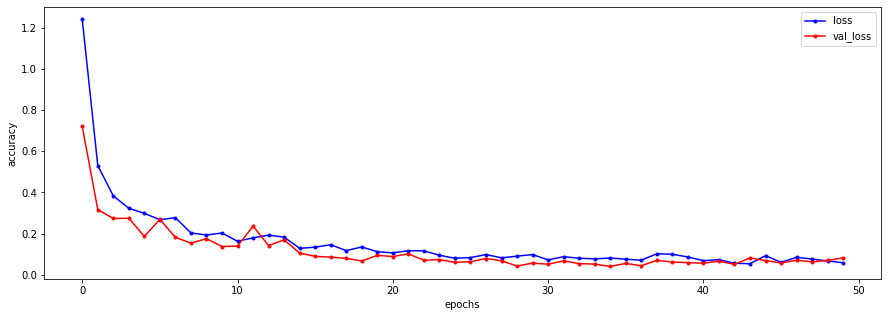

In [30]:
# 시각화
plt.figure(figsize = (15, 5))


plt.plot(h.history['loss'], label = 'loss', c='blue', marker = '.')
plt.plot(h.history['val_loss'], label = 'val_loss', c='red', marker = '.')

plt.xlabel("epochs")
plt.ylabel("accuracy")


plt.legend()
plt.show()

In [37]:
# 모델 저장
model.save("drowiness_new6.model")

INFO:tensorflow:Assets written to: drowiness_new6.model\assets


In [57]:
# 예측
prediction = model.predict(X_test)
prediction = np.argmax(prediction, axis=1) 

In [58]:
prediction

array([3, 3, 2, 3, 2, 3, 0, 1, 3, 3, 2, 2, 1, 2, 2, 2, 3, 3, 2, 0, 3, 3,
       2, 0, 2, 2, 2, 2, 2, 2, 3, 3, 2, 0, 0, 3, 2, 3, 0, 2, 3, 2, 3, 0,
       3, 2, 3, 2, 2, 2, 2, 0, 3, 1, 1, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 2,
       2, 2, 3, 0, 3, 3, 2, 3, 2, 2, 3, 3, 0, 2, 2, 0, 0, 2, 3, 2, 3, 0,
       3, 0, 0, 3, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 0, 3,
       2, 1, 0, 3, 2, 2, 3, 1, 2, 3, 2, 2, 3, 3, 0, 0, 1, 2, 2, 2, 1, 3,
       3, 1, 2, 1, 3, 2, 2, 3, 3, 0, 3, 3, 3, 2, 2, 0, 2, 3, 2, 3, 1, 1,
       0, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 0, 2, 2, 3, 2, 3, 1,
       0, 3, 3, 2, 3, 2, 2, 2, 3, 1, 2, 3, 2, 1, 1, 0, 0, 2, 3, 3, 0, 2,
       2, 2, 3, 3, 1, 1, 0, 2, 1, 2, 0, 1, 2, 3, 3, 2, 0, 1, 3, 0, 1, 2,
       3, 2, 3, 2, 3, 1, 2, 2, 1, 3, 2, 3, 2, 2, 1, 2, 3, 3, 3, 1, 1, 1,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 2, 3, 3, 1, 2, 3, 1, 3, 2, 2, 2, 2, 3,
       2, 1, 3, 0, 0, 3, 1, 1, 3, 1, 2, 2, 2, 0, 0, 3, 0, 3, 3, 3, 0, 1,
       2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1, 0, 2, 0, 3,

In [60]:
labels_new = ['Closed', 'no_yawn', 'Open', 'yawn']

In [64]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), prediction, target_names=labels_new))

              precision    recall  f1-score   support

      Closed       0.96      0.86      0.90        77
     no_yawn       0.83      0.98      0.90        61
        Open       0.96      0.99      0.98       219
        yawn       1.00      0.95      0.97       221

    accuracy                           0.96       578
   macro avg       0.94      0.95      0.94       578
weighted avg       0.96      0.96      0.96       578



In [65]:
# 예측 함수
labels_new = ['Closed', 'no_yawn', 'Open', 'yawn']
IMG_SIZE = 145
def prepare(filepath, face_cas_path='data/prediction-images/haarcascade_frontalface_default.xml') :
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

model = tensorflow.keras.models.load_model('drowiness_new6.model')

In [68]:
# Prediction
# 0-yawn, 1-no_yawn, 2-Closed, 3-Open
prediction = model.predict([prepare("train/Open/_10.jpg")])
np.argmax(prediction)

3